<a href="https://colab.research.google.com/github/drishtigulenia/data-science-Implementations/blob/main/linearRegressionImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

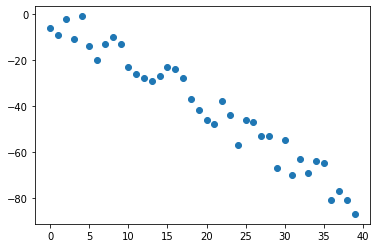

In [2]:
# dataset
# xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
# ys = np.array([5, 4, 6, 5, 6, 7], dtype=np.float64)

# generating random dataset
def create_dataset(hm, varience, step=2, correlation='neg'):
  ys = []
  val = 1
  for i in range(hm):
    y = val + random.randrange(-varience, varience)
    ys.append(y)
    if correlation == 'pos':
      val+=step
    elif correlation == 'neg':
      val-=step
  xs = [i for i in range(len(ys))]
  return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

# visualizing dataset
xs, ys = create_dataset(40,10,2,'neg')
plt.scatter(xs,ys)
plt.show()

In [ ]:
# determining best fit slope and best fit intercept
# slope = m(x) * m(y) - m(x*y) / (m(x))^2 - m(x^2) where m is mean
# intercept = m(y) - slope*x
def best_fit_slope_and_intercept(x, y):
  m = (((mean(x) * mean(y)) - mean(x*y)) / ((mean(x) * mean(x)) - mean(x*x)))
  c = mean(y) - m*mean(x)
  return m, c;

m,c = best_fit_slope_and_intercept(xs,ys)
print(m,c)

-2.0420262664165096 1.7195121951219363


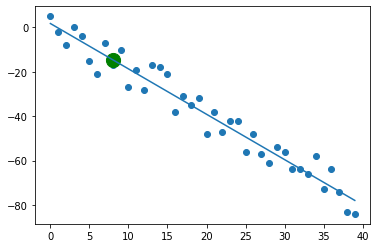

In [ ]:
# regression line equation
regression_line = [(m*x)+c for x in xs]

# plotting regression line
plt.plot(xs, regression_line)

# scattering dataset points
plt.scatter(xs, ys)

# predicting specific value
predict_x = 8
predict_y = (m*predict_x) + c

# scattering predicted value
plt.scatter(predict_x, predict_y, color = 'g', s=200)
plt.show()

In [ ]:
# But how accurate is this line?
# The way we determine the accuracy or confidence(both used interchangeably only in case of linear regression)
# is through r-squared or the coefficient of determination

# the value of R^2 has nothing to do with how “linear” the data is. It’s simply the ratio of how much variation 
# is explained by your model (best fit line) to the total variation (in the data set).
# r-squared = 1 - squared_error(regression_line)/ squared_error(mean_line)
# You can have a “flat” series of data (parallel to the x-axis) with very little scatter, and a linear regression 
# will give R^2 very close to zero.  
# for example having data like:
# xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
# ys = np.array([7, 7, 7, 7, 7, 7], dtype=np.float64)
# u will get r-squared as nan, squared error of regression line becomes 0 as well as squared error of mean line is also 0
# and r becomes 1-(0/0) which is nan. But we know our regression line is matching the mean line properly. Still it is
# not giving us a correct output. Therefore we use p-value to determine that will indicate the significance of the
# linear relationship.


def squared_error(y_orig, y_line):
    return sum((y_orig - y_line)**2)

def coefficient_of_determination(y_orig, y_line):
  squared_error_regr = squared_error(y_orig, y_line)
  y_mean_line = [mean(y_orig) for y in y_orig]
  squared_error_mean_line = squared_error(y_orig, y_mean_line)
  return 1-(squared_error_regr/squared_error_mean_line)

r_squared = coefficient_of_determination(ys, regression_line)
r_squared

0.9483612061853461

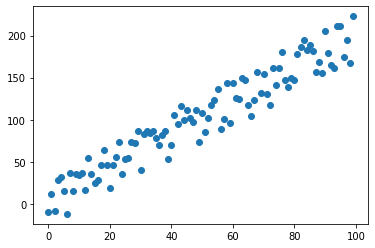

In [80]:
# implementaion with gradient descent

xg, yg = create_dataset(100,30,2,'pos')
plt.scatter(xg,yg);
plt.show()
xg3 = xg
# xg2 = np.ones((xg.size))
# xg = np.append(xg2,xg3);
# xg
xg =np.vstack((np.ones((xg.size, )), xg)).T

In [141]:
def model(X,Y,learning_rate, iterations):
  m = Y.size
  theta = np.zeros((2,1))
  cost_l = []
  for i in range(iterations):
    y_pred = np.dot(theta.T, X.T)
    cost = (1/(2 * m)) * np.sum(np.square(y_pred - Y));
    d_theta = (1/m) * np.dot(X.T, (y_pred - Y).T)
    theta = theta - (learning_rate*d_theta)
    cost_l.append(cost)
  return theta, cost_l

<function matplotlib.pyplot.show>

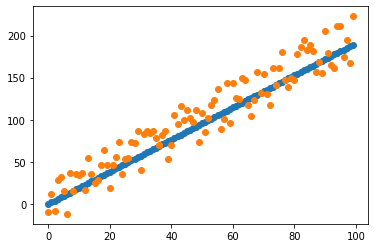

In [160]:
iterations = 15
learning_rate = 0.00005

theta, cost = model(xg,yg,learning_rate=learning_rate, iterations=iterations)

x_pred = np.array([[1, 1, 1, 1], [100, 108, -9, -34]])
y_pred = np.dot(theta.T, xg.T)

plt.scatter(xg[:,1], y_pred)
plt.scatter(xg3, yg)
plt.show

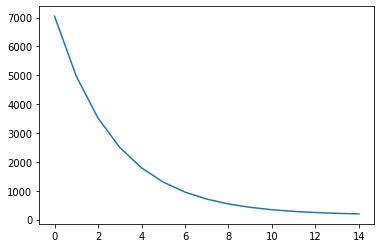

In [161]:
rng = np.arange(0, iterations)
plt.plot(rng, cost)
plt.show()